In [ ]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

#Data Analysis

In [ ]:
#Read the training & test data
liver_df = pd.read_csv('/content/indian_liver_patient.csv')

In [ ]:
liver_df.head()

Age  Gender  Total_Bilirubin  ...  Albumin  Albumin_and_Globulin_Ratio  Dataset
0   65  Female              0.7  ...      3.3                        0.90        1
1   62    Male             10.9  ...      3.2                        0.74        1
2   62    Male              7.3  ...      3.3                        0.89        1
3   58    Male              1.0  ...      3.4                        1.00        1
4   72    Male              3.9  ...      2.4                        0.40        1

[5 rows x 11 columns]

In [ ]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
#Describe gives statistical information about NUMERICAL columns in the dataset
liver_df.describe(include='all')
#We can see that there are missing values for Albumin_and_Globulin_Ratio as only 579 entries have valid values indicating 4 missing values.
#Gender has only 2 values - Male/Female

Age Gender  ...  Albumin_and_Globulin_Ratio     Dataset
count   583.000000    583  ...                  579.000000  583.000000
unique         NaN      2  ...                         NaN         NaN
top            NaN   Male  ...                         NaN         NaN
freq           NaN    441  ...                         NaN         NaN
mean     44.746141    NaN  ...                    0.947064    1.286449
std      16.189833    NaN  ...                    0.319592    0.452490
min       4.000000    NaN  ...                    0.300000    1.000000
25%      33.000000    NaN  ...                    0.700000    1.000000
50%      45.000000    NaN  ...                    0.930000    1.000000
75%      58.000000    NaN  ...                    1.100000    2.000000
max      90.000000    NaN  ...                    2.800000    2.000000

[11 rows x 11 columns]

In [ ]:
#Which features are available in the dataset?
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
#Check for any null values
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

The only data that is null is the Albumin_and_Globulin_Ratio - Only 4 rows are null. Lets see whether this is an important feature

#Data Visualization

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


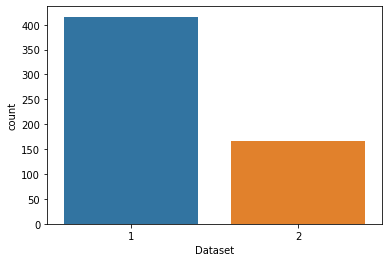

In [ ]:

sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


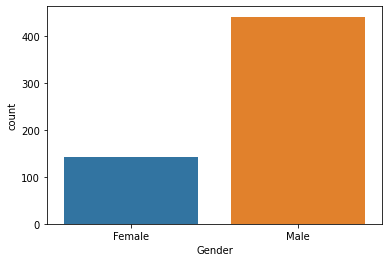

In [ ]:
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


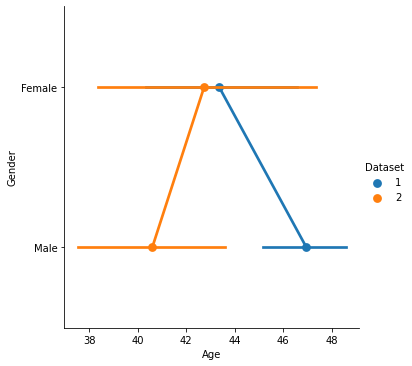

In [ ]:
sns.factorplot(x="Age", y="Gender", hue="Dataset", data=liver_df);

Age seems to be a factor for liver disease for both male and female genders

In [ ]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)

Dataset  Gender  Age
2        2  Female   50
3        2    Male  117
0        1  Female   92
1        1    Male  324

In [ ]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

Dataset  Gender        Age
2        2  Female  42.740000
3        2    Male  40.598291
0        1  Female  43.347826
1        1    Male  46.950617

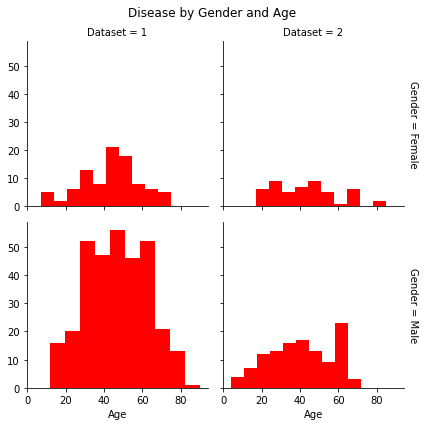

In [ ]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

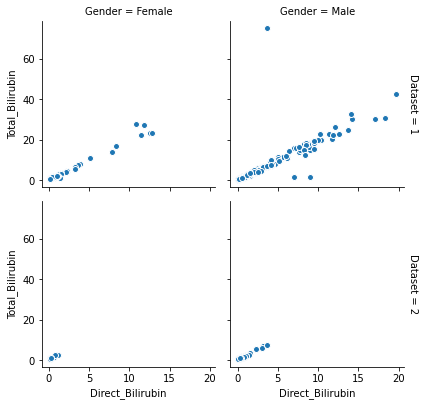

In [ ]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


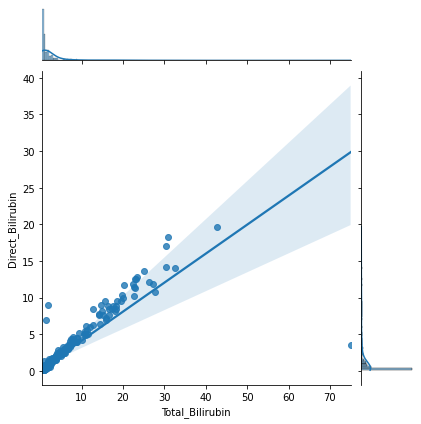

In [ ]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")

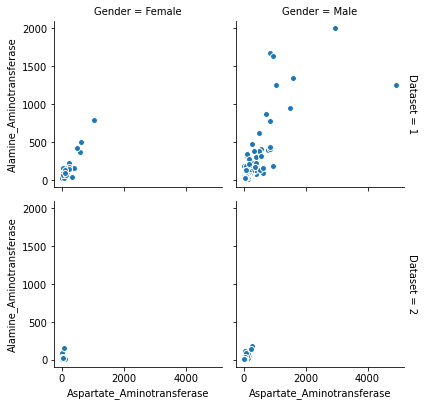

In [ ]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


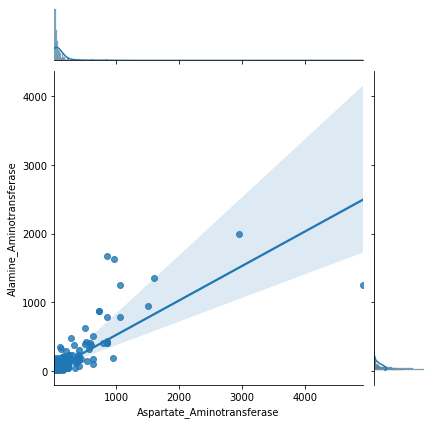

In [ ]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

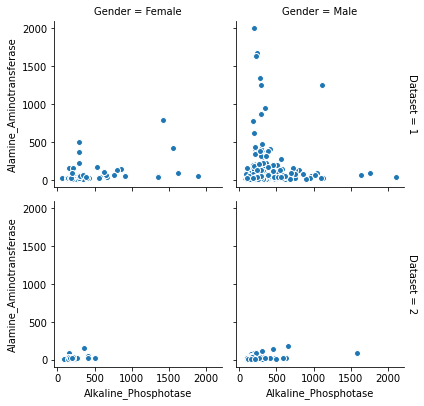

In [ ]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


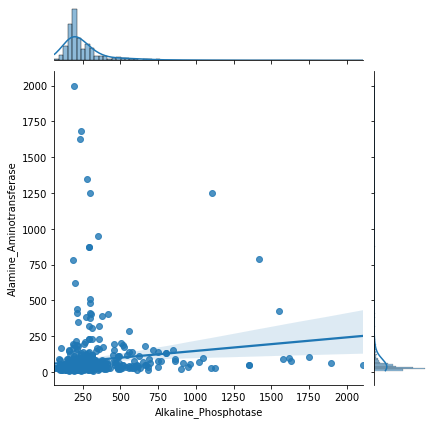

In [ ]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

We can observe there's no linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase

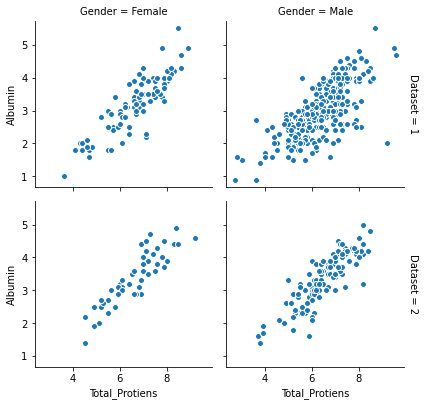

In [ ]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Total_Protiens and Albumin and the gender. We have the possibility of removing one of this feature.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


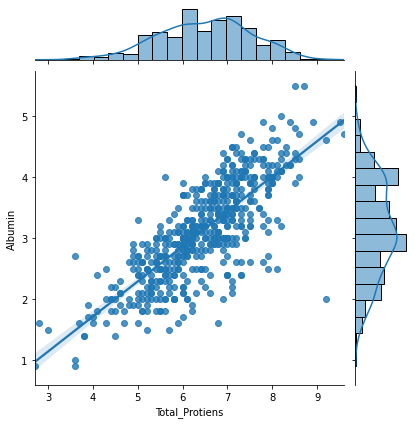

In [ ]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")

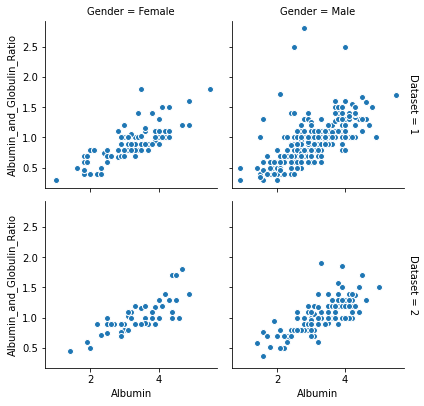

In [ ]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


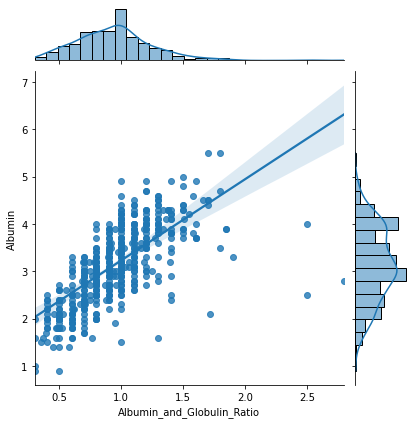

In [ ]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")

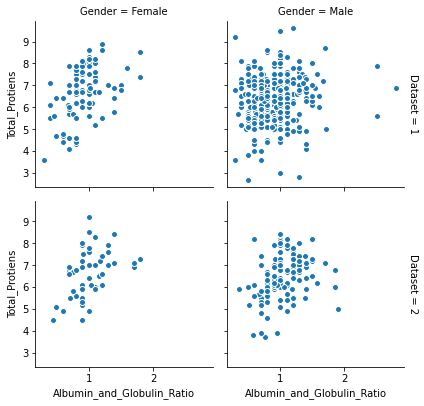

In [ ]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

#Observation

From the above jointplots and scatterplots, we find direct relationship between the following features:

*   Direct_Bilirubin & Total_Bilirubin
*   Aspartate_Aminotransferase & Alamine_Aminotransferase
*   Total_Protiens & Albumin
*   Albumin_and_Globulin_Ratio & Albumin


Hence, we can very well find that we can omit one of the features. I'm going to keep the follwing features:

*   Total_Bilirubin
*   Alamine_Aminotransferase
*   Total_Protiens
*   Albumin_and_Globulin_Ratio
*   Albumin


In [ ]:
liver_df.head(3)

Age  Gender  Total_Bilirubin  ...  Albumin  Albumin_and_Globulin_Ratio  Dataset
0   65  Female              0.7  ...      3.3                        0.90        1
1   62    Male             10.9  ...      3.2                        0.74        1
2   62    Male              7.3  ...      3.3                        0.89        1

[3 rows x 11 columns]

In [ ]:
pd.get_dummies(liver_df['Gender'], prefix = 'Gender').head()

Gender_Female  Gender_Male
0              1            0
1              0            1
2              0            1
3              0            1
4              0            1

In [ ]:
liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['Gender'], prefix = 'Gender')], axis=1)

In [ ]:
liver_df.head()

Age  Gender  Total_Bilirubin  ...  Dataset  Gender_Female  Gender_Male
0   65  Female              0.7  ...        1              1            0
1   62    Male             10.9  ...        1              0            1
2   62    Male              7.3  ...        1              0            1
3   58    Male              1.0  ...        1              0            1
4   72    Male              3.9  ...        1              0            1

[5 rows x 13 columns]

In [ ]:
liver_df.describe()

Age  Total_Bilirubin  ...  Gender_Female  Gender_Male
count  583.000000       583.000000  ...     583.000000   583.000000
mean    44.746141         3.298799  ...       0.243568     0.756432
std     16.189833         6.209522  ...       0.429603     0.429603
min      4.000000         0.400000  ...       0.000000     0.000000
25%     33.000000         0.800000  ...       0.000000     1.000000
50%     45.000000         1.000000  ...       0.000000     1.000000
75%     58.000000         2.600000  ...       0.000000     1.000000
max     90.000000        75.000000  ...       1.000000     1.000000

[8 rows x 12 columns]

In [ ]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]

Age  Gender  Total_Bilirubin  ...  Dataset  Gender_Female  Gender_Male
209   45  Female              0.9  ...        1              1            0
241   51    Male              0.8  ...        1              0            1
253   35  Female              0.6  ...        2              1            0
312   27    Male              1.3  ...        2              0            1

[4 rows x 13 columns]

In [ ]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

In [ ]:
#changing  value of 2 to 0
for i in range(583):
    if liver_df.iloc[i,10]==2:
        liver_df.iloc[i,10]=0

In [ ]:
liver_df['Dataset'].unique()

array([1, 0])

In [ ]:
#converting textual data to numerical form 0 = Male & 1 = Female
for i in range(583):
    if liver_df.iloc[i,1]=='Male':
        liver_df.iloc[i,1]=0
    else:
        liver_df.iloc[i,1]=1

In [ ]:
liver_df['Gender'].unique()

array([1, 0], dtype=object)

In [ ]:
# The input variables/features are all the inputs except Dataset. The prediction or label is 'Dataset' that determines whether the patient has liver disease or not. 
X = liver_df.drop(['Dataset'], axis=1)
X.head(3)

Age Gender  ...  Gender_Female  Gender_Male
0   65      1  ...              1            0
1   62      0  ...              0            1
2   62      0  ...              0            1

[3 rows x 12 columns]

In [ ]:
y = liver_df['Dataset'] # 1 for liver disease; 2 for no liver disease

In [ ]:
# Correlation
liver_corr = X.corr()

In [ ]:
liver_corr

Age  ...  Gender_Male
Age                         1.000000  ...     0.056560
Total_Bilirubin             0.011763  ...     0.089291
Direct_Bilirubin            0.007529  ...     0.100436
Alkaline_Phosphotase        0.080425  ...    -0.027496
Alamine_Aminotransferase   -0.086883  ...     0.082332
Aspartate_Aminotransferase -0.019910  ...     0.080336
Total_Protiens             -0.187461  ...    -0.089121
Albumin                    -0.265924  ...    -0.093799
Albumin_and_Globulin_Ratio -0.216089  ...    -0.003404
Gender_Female              -0.056560  ...    -1.000000
Gender_Male                 0.056560  ...     1.000000

[11 rows x 11 columns]

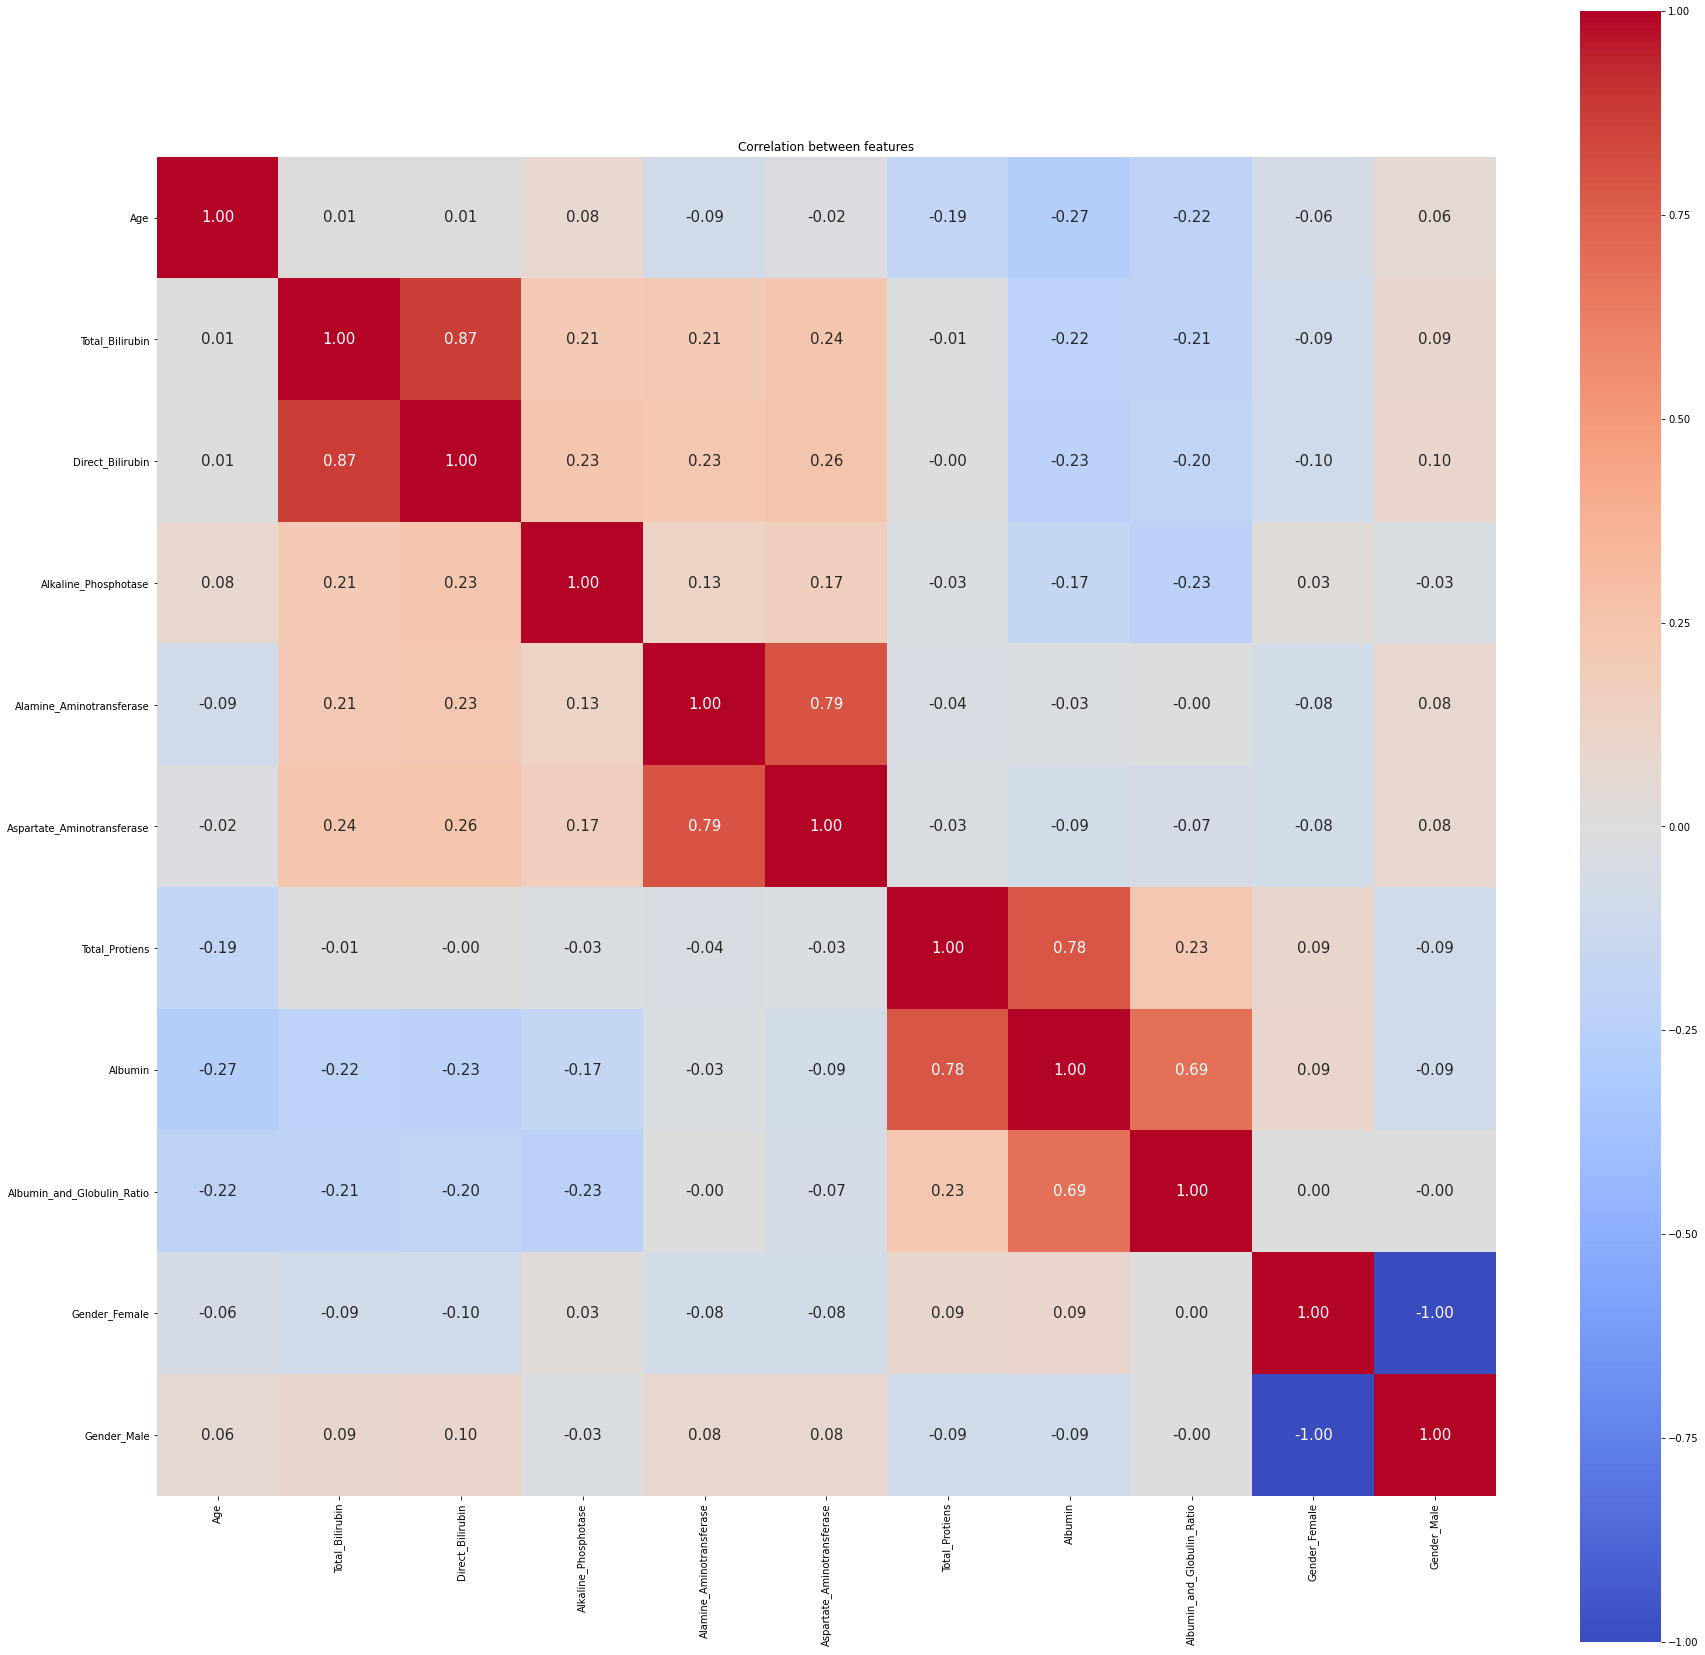

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

#Machine Learning

In [ ]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(466, 12)
(466,)
(117, 12)
(117,)


In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
variance = pca.explained_variance_ratio_

In [ ]:
print(variance)

[2.66758292e-01 2.12387582e-01 1.69065733e-01 1.15714816e-01
 7.83604529e-02 6.84131375e-02 5.43535389e-02 1.82370720e-02
 1.18435737e-02 4.86580308e-03 1.64995845e-32 2.09690396e-34]


Logistic Regression Training Score: 
 72.75
Logistic Regression Test Score: 
 67.52
Coefficient: 
 [[-0.90261104 -0.73710716]]
Intercept: 
 [-1.43541982]
Accuracy: 
 0.6752136752136753
Confusion Matrix: 
 [[78  0]
 [38  1]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.67      1.00      0.80        78
           2       1.00      0.03      0.05        39

    accuracy                           0.68       117
   macro avg       0.84      0.51      0.43       117
weighted avg       0.78      0.68      0.55       117



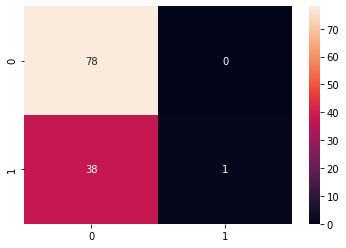

In [ ]:
#2) Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [ ]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

Feature  Correlation
1              Total_Bilirubin    -0.737107
0                          Age    -0.902611
2             Direct_Bilirubin          NaN
3         Alkaline_Phosphotase          NaN
4     Alamine_Aminotransferase          NaN
5   Aspartate_Aminotransferase          NaN
6               Total_Protiens          NaN
7                      Albumin          NaN
8   Albumin_and_Globulin_Ratio          NaN
9                Gender_Female          NaN
10                 Gender_Male          NaN

Gaussian Score: 
 72.75
Gaussian Test Score: 
 68.38
Accuracy: 
 0.6837606837606838
[[73  5]
 [32  7]]
              precision    recall  f1-score   support

           1       0.70      0.94      0.80        78
           2       0.58      0.18      0.27        39

    accuracy                           0.68       117
   macro avg       0.64      0.56      0.54       117
weighted avg       0.66      0.68      0.62       117



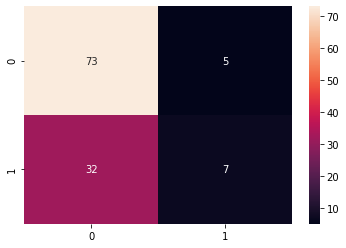

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=1100,criterion = "entropy",random_state=0)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 74.36
Accuracy: 
 0.7435897435897436
[[11 28]
 [ 2 76]]
              precision    recall  f1-score   support

           0       0.85      0.28      0.42        39
           1       0.73      0.97      0.84        78

    accuracy                           0.74       117
   macro avg       0.79      0.63      0.63       117
weighted avg       0.77      0.74      0.70       117



In [ ]:
#fitting into knn model

from sklearn.neighbors import KNeighborsClassifier
classifi = KNeighborsClassifier(n_neighbors = 36)
classifi.fit(X_train,y_train)
#predicted_output
rf_predicted = classifi.predict(X_test)

print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))


Accuracy: 
 0.6495726495726496
[[ 0 39]
 [ 2 76]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.66      0.97      0.79        78

    accuracy                           0.65       117
   macro avg       0.33      0.49      0.39       117
weighted avg       0.44      0.65      0.53       117



In [ ]:
###Model evaluation
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest'],
    'Score': [ logreg_score, gauss_score, random_forest_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

Model  Score  Test Score
2         Random Forest  98.50       71.79
1  Gaussian Naive Bayes  72.75       68.38
0   Logistic Regression  72.75       67.52

In [ ]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

from sklearn.feature_selection import RFE
rfe =RFE(linear, n_features_to_select=3)
rfe.fit(X,y)

Linear Regression Score: 
 7.53
Linear Regression Test Score: 
 12.97
Coefficient: 
 [-0.06927064 -0.02827683]
Intercept: 
 1.2746781115879828


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=3, step=1, verbose=0)

In [ ]:
for i in range(len(rfe.ranking_)):
    if rfe.ranking_[i] == 1:
        print(X.columns.values[i])

Total_Protiens
Albumin
Gender_Male


In [ ]:
#I'm considering seven important features based on recursive feature elimination
#finX = liver_df[['Age','Direct_Bilirubin','Total_Protiens','Albumin', 'Gender_Female', 'Gender_Male']]
finX = liver_df[['Total_Protiens','Albumin', 'Gender_Male']]
finX.head(4)

Total_Protiens  Albumin  Gender_Male
0             6.8      3.3            0
1             7.5      3.2            1
2             7.0      3.3            1
3             6.8      3.4            1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(finX, y, test_size=0.30, random_state=101)

Logistic Regression Training Score: 
 71.08
Logistic Regression Test Score: 
 71.43
Coefficient: 
 [[-0.58254377  1.08940697 -0.54185122]]
Intercept: 
 [-0.20423275]
Accuracy: 
 0.7142857142857143
Confusion Matrix: 
 [[120   4]
 [ 46   5]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.72      0.97      0.83       124
           2       0.56      0.10      0.17        51

    accuracy                           0.71       175
   macro avg       0.64      0.53      0.50       175
weighted avg       0.67      0.71      0.63       175



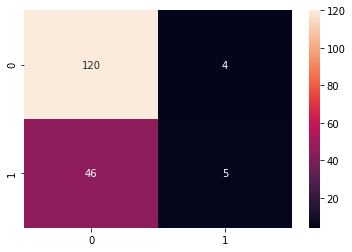

In [ ]:
#Logistic Regression
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")